## Advanced Lane Finding Project

The goals / steps of this project are the following:

* Compute the camera calibration matrix and distortion coefficients given a set of chessboard images.
* Apply a distortion correction to raw images.
* Use color transforms, gradients, etc., to create a thresholded binary image.
* Apply a perspective transform to rectify binary image ("birds-eye view").
* Detect lane pixels and fit to find the lane boundary.
* Determine the curvature of the lane and vehicle position with respect to center.
* Warp the detected lane boundaries back onto the original image.
* Output visual display of the lane boundaries and numerical estimation of lane curvature and vehicle position.

---
## First, I'll compute the camera calibration using chessboard images

In [1]:
import numpy as np
import cv2
import glob
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib.image as mpimg

# prepare object points, like (0,0,0), (1,0,0), (2,0,0) ....,(6,5,0)
objp = np.zeros((6*8,3), np.float32)
objp[:,:2] = np.mgrid[0:8,0:6].T.reshape(-1,2)

# Arrays to store object points and image points from all the images.
objpoints = [] # 3d points in real world space
imgpoints = [] # 2d points in image plane.

# Make a list of calibration images
images = glob.glob('camera_cal/calibration*.jpg')

print ('images', images)



images ['camera_cal/calibration5.jpg', 'camera_cal/calibration4.jpg', 'camera_cal/calibration6.jpg', 'camera_cal/calibration7.jpg', 'camera_cal/calibration3.jpg', 'camera_cal/calibration2.jpg', 'camera_cal/calibration1.jpg', 'camera_cal/calibration20.jpg', 'camera_cal/calibration19.jpg', 'camera_cal/calibration18.jpg', 'camera_cal/calibration15.jpg', 'camera_cal/calibration14.jpg', 'camera_cal/calibration16.jpg', 'camera_cal/calibration17.jpg', 'camera_cal/calibration13.jpg', 'camera_cal/calibration12.jpg', 'camera_cal/calibration10.jpg', 'camera_cal/calibration11.jpg', 'camera_cal/calibration9.jpg', 'camera_cal/calibration8.jpg']


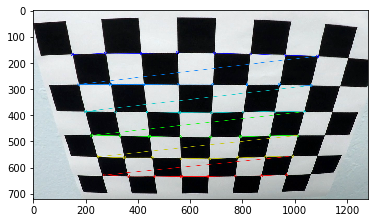

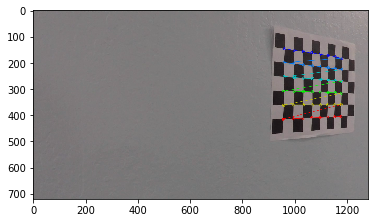

In [2]:
# Step through the list and search for chessboard corners
for fname in images:
#    print ('fname', fname)
    img = cv2.imread(fname)
    gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)

    # Find the chessboard corners
    ret, corners = cv2.findChessboardCorners(gray, (8,6),None)

    # If found, add object points, image points
    if ret == True:
#        print ('chess detected')
        objpoints.append(objp)
        imgpoints.append(corners)

        # Draw and display the corners
        img = cv2.drawChessboardCorners(img, (8,6), corners, ret)
        plt.imshow(img)
        plt.show()


In [3]:
#print ('objpoints', objpoints)

In [4]:
#print ('imgpoints', imgpoints)

## And so on and so forth...

In [5]:
ret, mtx, dist, rvecs, tvecs = cv2.calibrateCamera(objpoints, imgpoints, gray.shape[::-1],None,None)

In [6]:
print ('ret', ret)
print ('mtx', mtx)
print ('dist', dist)
print ('rvecs', rvecs)
print ('tvecs', tvecs)

ret 1.2829387169804487
mtx [[1.03917011e+03 0.00000000e+00 6.62323978e+02]
 [0.00000000e+00 1.05185381e+03 2.40422287e+02]
 [0.00000000e+00 0.00000000e+00 1.00000000e+00]]
dist [[-4.28751441e-01  1.52897252e+00  1.63997966e-02 -6.14051877e-04
  -3.08113453e+00]]
rvecs [array([[ 0.5322764 ],
       [-0.03940632],
       [ 0.01683234]]), array([[-0.03668466],
       [-0.46360684],
       [ 0.04568063]])]
tvecs [array([[-3.78399971],
       [-0.56043417],
       [ 7.14252067]]), array([[ 5.66587377],
       [-1.78747199],
       [19.11036854]])]


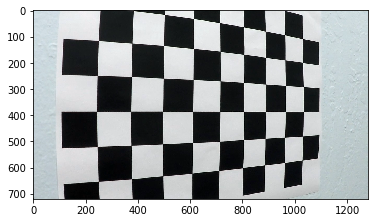

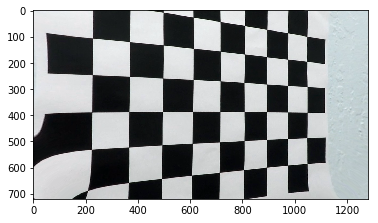

--------------


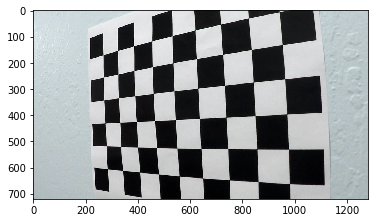

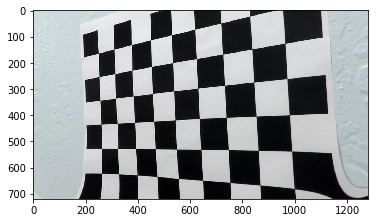

--------------


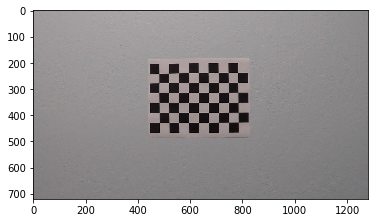

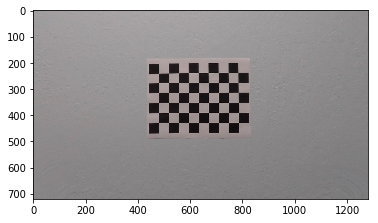

--------------


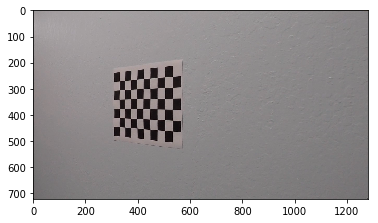

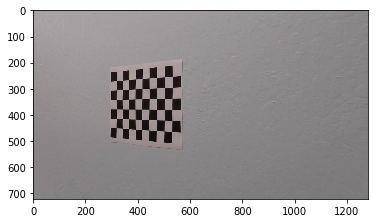

--------------


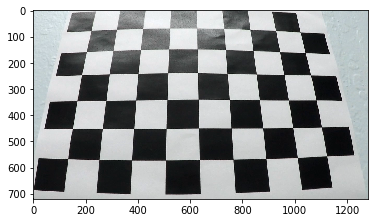

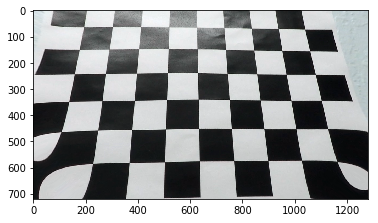

--------------


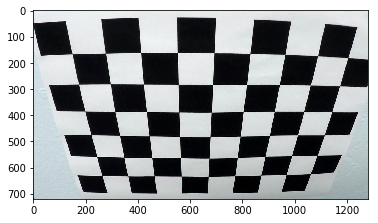

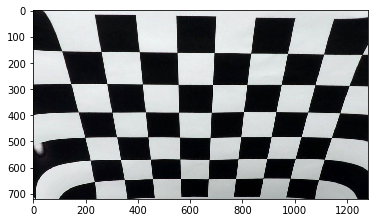

--------------


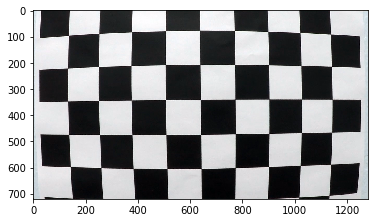

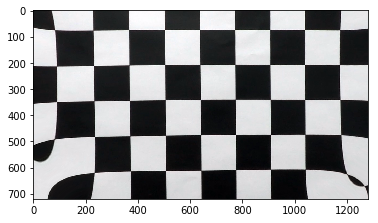

--------------


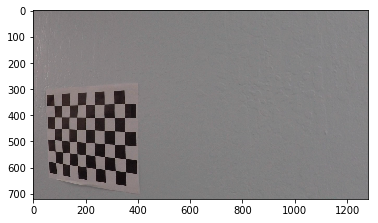

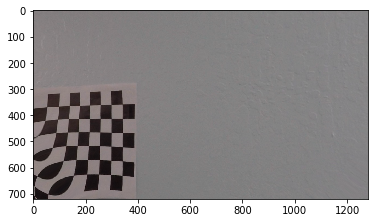

--------------


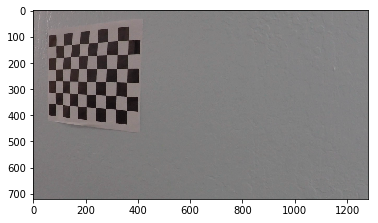

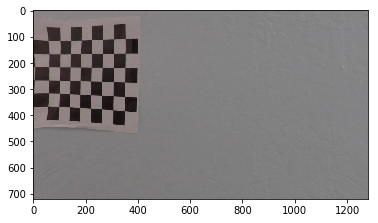

--------------


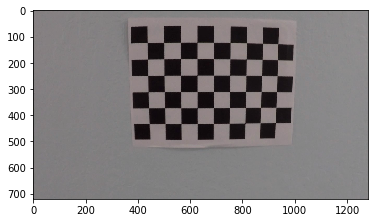

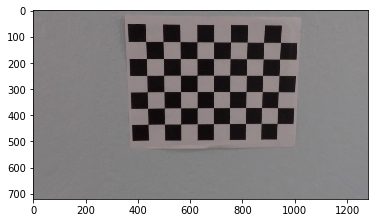

--------------


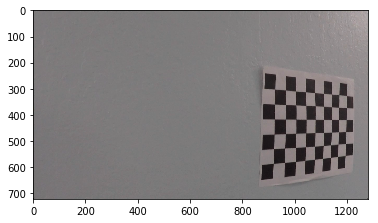

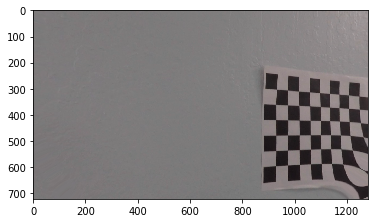

--------------


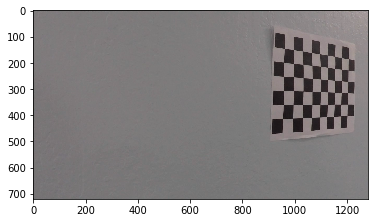

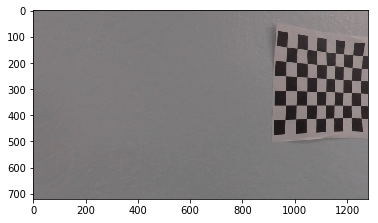

--------------


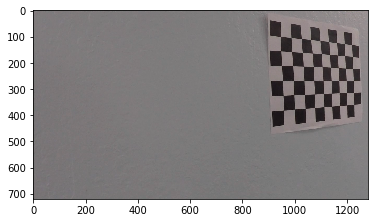

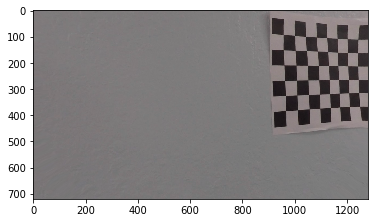

--------------


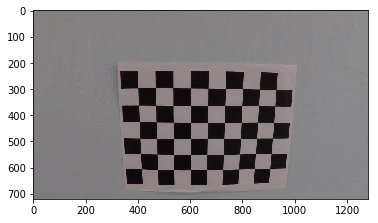

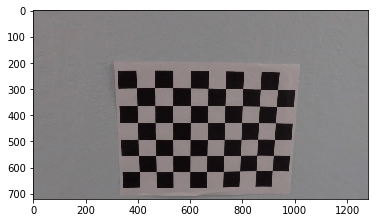

--------------


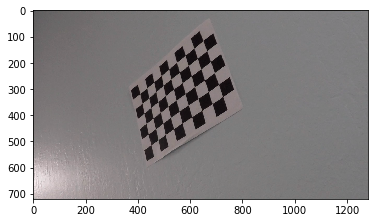

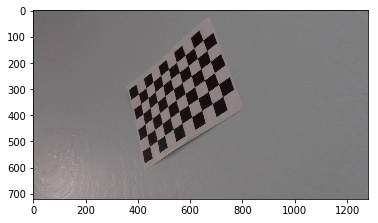

--------------


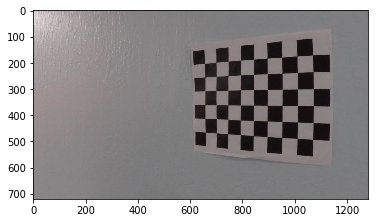

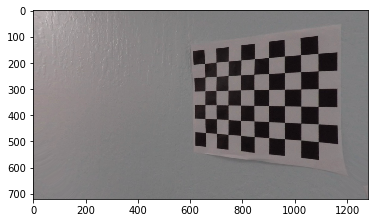

--------------


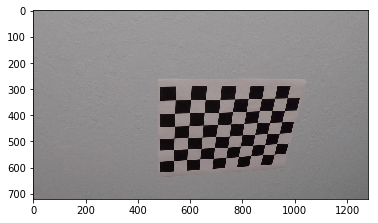

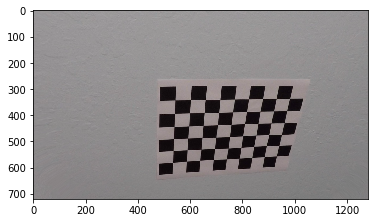

--------------


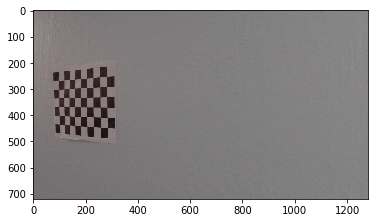

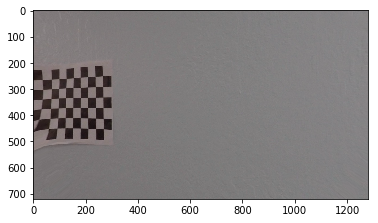

--------------


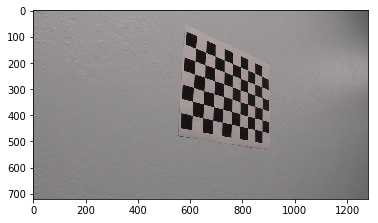

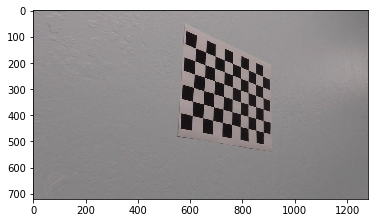

--------------


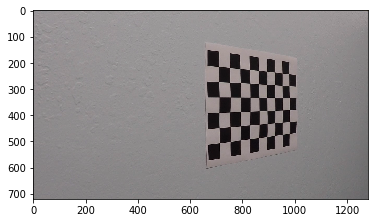

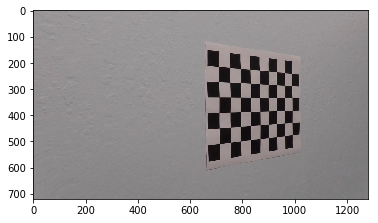

--------------


In [7]:
for fname in images:
    img = cv2.imread(fname)
    dst = cv2.undistort(img, mtx, dist, None, mtx)
    plt.imshow(img)
    plt.show()
    plt.imshow(dst)
    plt.show()
    print ('--------------')